# Data Manipulation


In [2]:
try:
    import arcpy
except ImportError:
    print("import arcpy error")
    
import os

## Exploring Spatial Data


### Checking for the Existence of Data

Two types of paths

- `System Paths`
  - System paths are the paths commonly used in Python and other programming languages to reference files and directories on your computer's file system.
  - **Absolute path**: `C:\Projects\Data\my_file.shp`
  - **Relative path**: `..\Data\my_file.shp`

* `Catalog Paths`
  - Catalog paths are specific to ArcGIS and are used to reference datasets, layers, and other geographic resources within a GIS workspace.
  - **File geodatabase feature class**: `C:\Projects\MyProject\my_geodatabase.gdb\my_feature_class`
  - **Shapefile**: `C:\Projects\MyProject\Data\my_shapefile.shp`


In [3]:
os.path.exists(r".\database\cities.shp"), arcpy.Exists(r".\database\cities.shp")

(True, True)

In [4]:
os.path.exists(r".\database\testdata.gdb\buffers_poly"),arcpy.Exists(r".\database\testdata.gdb\buffers_poly")

(False, True)

### Describing Data

- The `Describe` function is used to determine properties of dataset
- General syntax
  ```python
  import arcpy
  < variable> = arcpy.Describe(< input dataset>)
  ```
- Online help
  - http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/describe.htm


In [5]:
desc = arcpy.Describe("./database/cities.shp")
print(desc.datatype)
print(desc.shapeType)

ShapeFile
Point


In [6]:
# Set the workspace to the 'database' folder
arcpy.env.workspace = "./database"

# Allow overwrite of output files
arcpy.env.overwriteOutput = True

# Input feature class to be clipped
infc = "railroads.shp"

# Clip features
clipfc = "new_mexico.shp"

# Output feature class after clipping
outfc = "Results/railroads_clip.shp"

# Describe the clip features to determine their geometry type
desc = arcpy.Describe(clipfc)
type = desc.shapeType

# Check if the clip features are polygons
if type == "Polygon":
    # Perform the clip analysis
    arcpy.Clip_analysis(infc, clipfc, outfc)
    print("Clip analysis run successfully.")
else:
    print("The clip features are not polygons.")

Clip analysis run successfully.


### The Describe function

- `Describe` function will always return a `Describe object`
- The `Describe` function returns **a set of generic properties** for all Describe objects.

  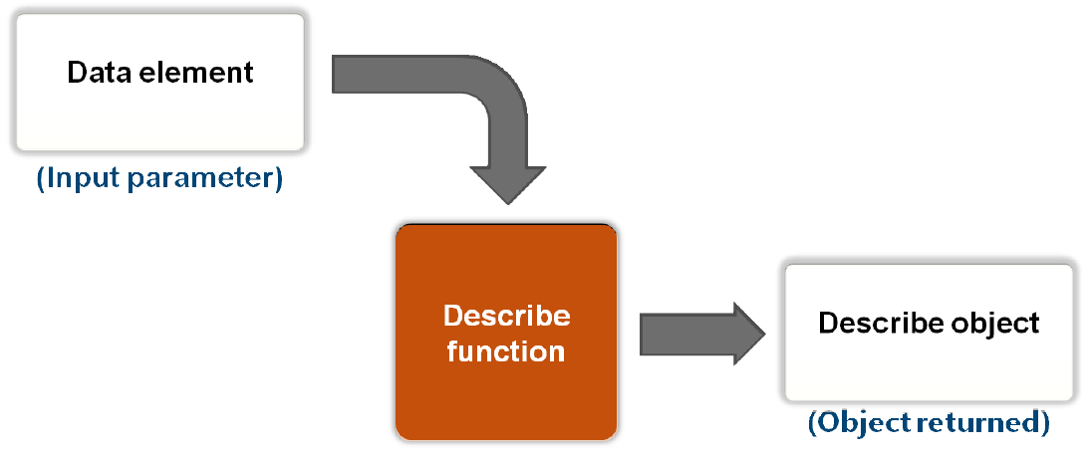

- Generic Describe Object Properties

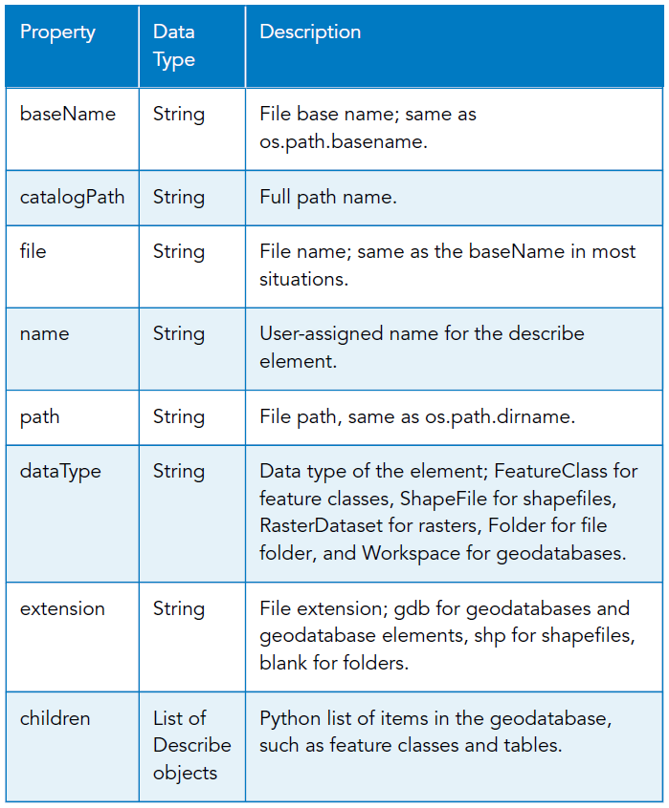


In [7]:
data = "./database/cities.shp"
desc = arcpy.Describe(data)
print("baseName:    {}".format(desc.baseName))
print("catalogPath: {}".format(desc.catalogPath))
print("file:        {}".format(desc.file))
print("name:        {}".format(desc.name))
print("path:        {}".format(desc.path))
print("dataType:    {}".format(desc.dataType))
print("extension:   {}".format(desc.extension))

baseName:    cities
catalogPath: ./database/cities.shp
file:        cities.shp
name:        cities.shp
path:        ./database
dataType:    ShapeFile
extension:   shp


### Feature class Describe properties

- [Reading Materials](http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/featureclass-properties.htm)

  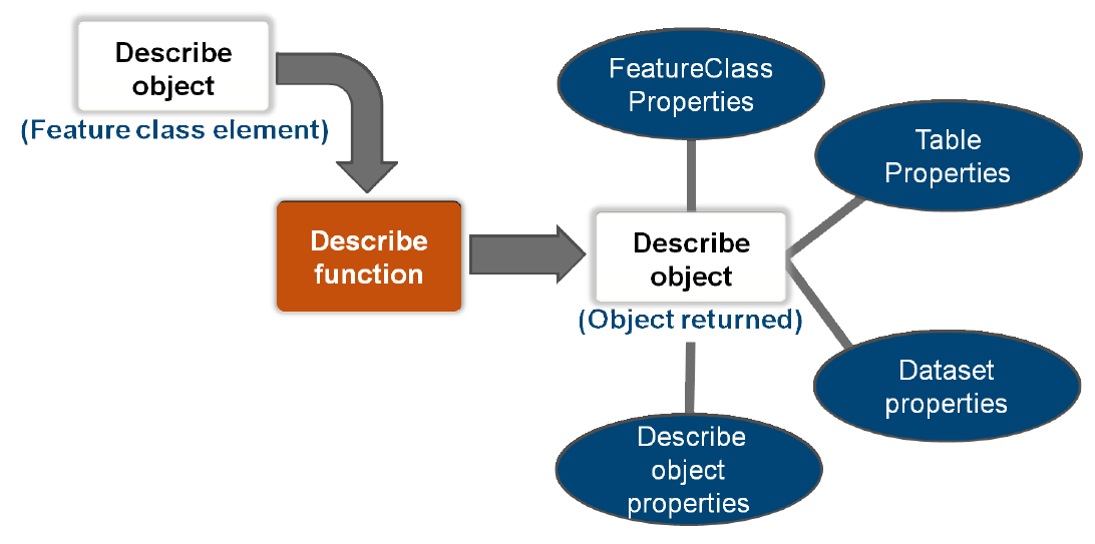

#### Feature Class properties

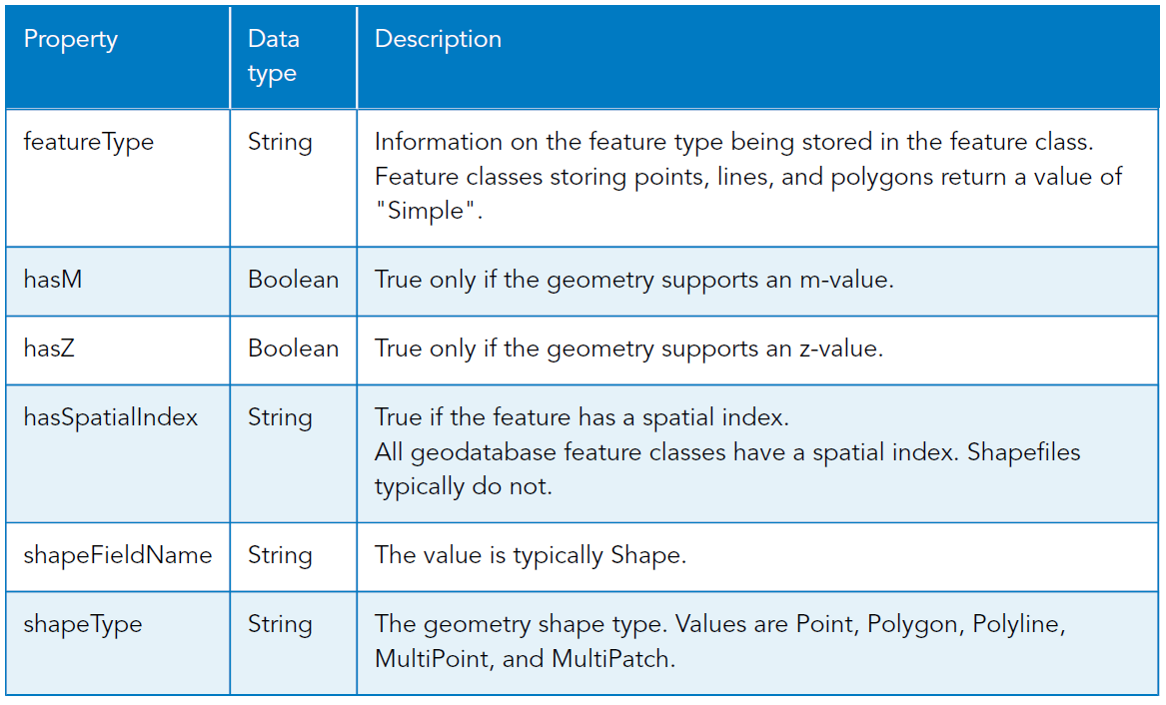


In [8]:
data = "./database/cities.shp"
desc = arcpy.Describe(data)

# Print some feature class properties
print("Feature Type:  {}".format(desc.featureType))
print("Shape Type :   {}".format(desc.shapeType))
print("Spatial Index: {}".format(desc.hasSpatialIndex))

Feature Type:  Simple
Shape Type :   Point
Spatial Index: False


#### [Table properties](http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/table-properties.htm)

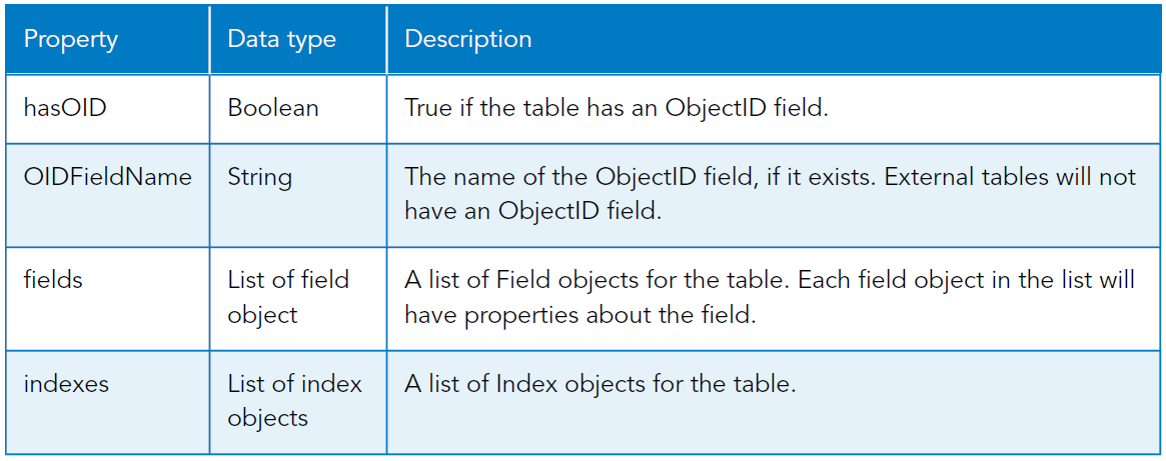


In [9]:
data = "./database/cities.shp"
desc = arcpy.Describe(data)

# If the table has an OID, print the OID field name
if desc.hasOID:
    print("OIDFieldName: {}".format(desc.OIDFieldName))
# Print the names and types of all the fields in the table
for field in desc.fields:
    print("{:22} : {}".format(field.name,field.type))

OIDFieldName: FID
FID                    : OID
Shape                  : Geometry
CITIESX020             : Double
FEATURE                : String
NAME                   : String
POP_RANGE              : String
POP_2000               : Integer
FIPS55                 : String
COUNTY                 : String
FIPS                   : String
STATE                  : String
STATE_FIPS             : String
DISPLAY                : SmallInteger


#### [Dataset Properties](http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/dataset-properties.htm)

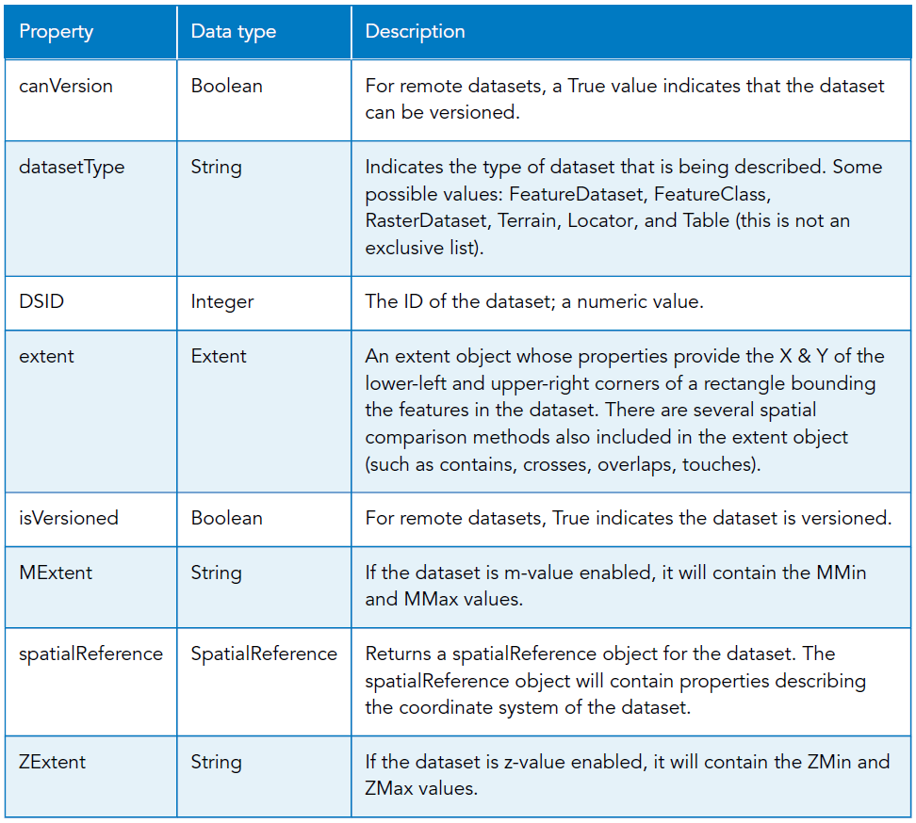


In [10]:
desc = arcpy.Describe(r"./database/new_mexico.shp")
print("Dataset Type: {0}".format(desc.datasetType))
print(f"Extent:\n  XMin: {desc.extent.XMin}, XMax: {desc.extent.XMax}, \n \
      YMin: { desc.extent.YMin}, YMax: {desc.extent.YMax}")
print("Spatial reference name: {0}:".format(desc.spatialReference.name))

Dataset Type: FeatureClass
Extent:
  XMin: -109.05010223388672, XMax: -103.00065612792969, 
       YMin: 31.331899642944336, YMax: 36.99942398071289
Spatial reference name: GCS_North_American_1983:


### Raster Describe properties

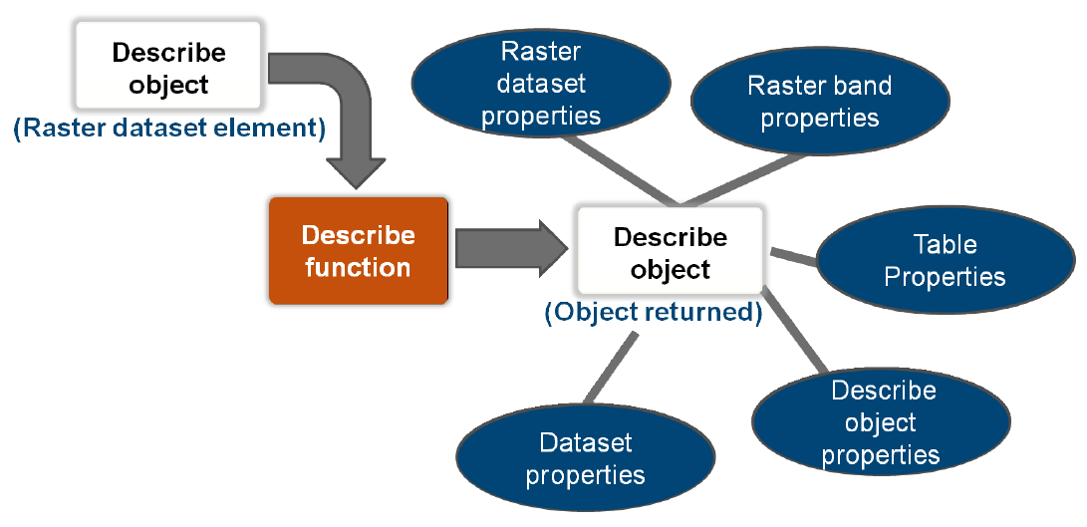

#### [Raster Dataset properties](http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/raster-dataset-properties.htm)

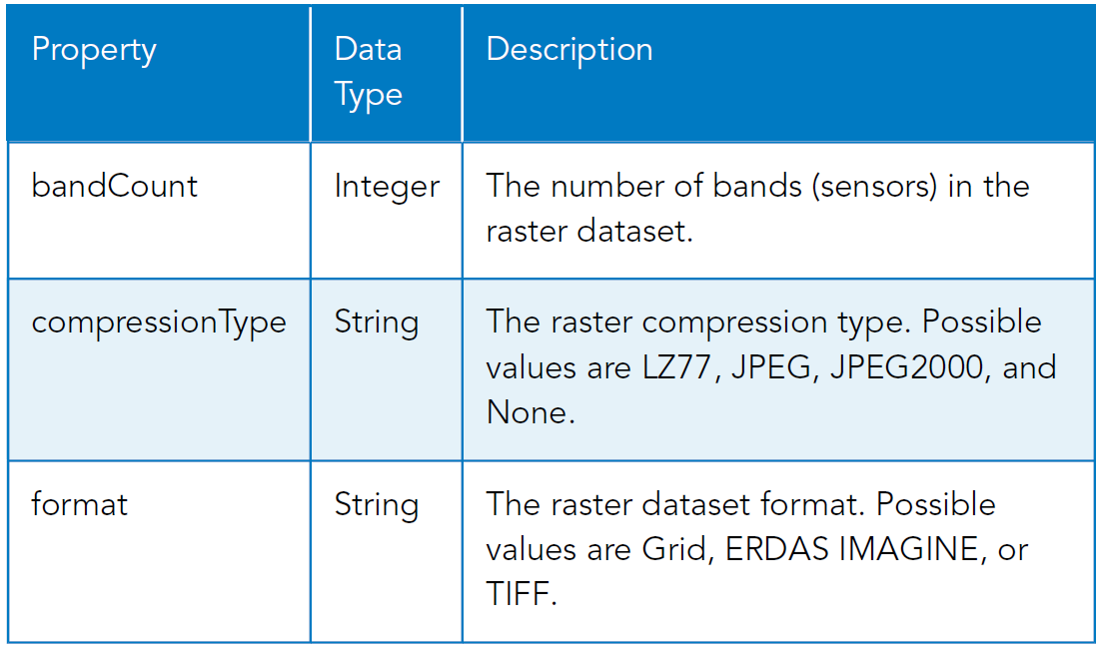


In [11]:
desc = arcpy.Describe("./database/testdata.gdb/ElevationFloat")
print("{:20} {}".format("bandCount:",desc.bandCount))
print("{:20} {}".format("compressionType:",desc.compressionType))
print("{:20} {}".format("format:",desc.format))

bandCount:           1
compressionType:     NONE
format:              FGDBR


#### [Raster Band properties](http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/raster-band-properties.htm)

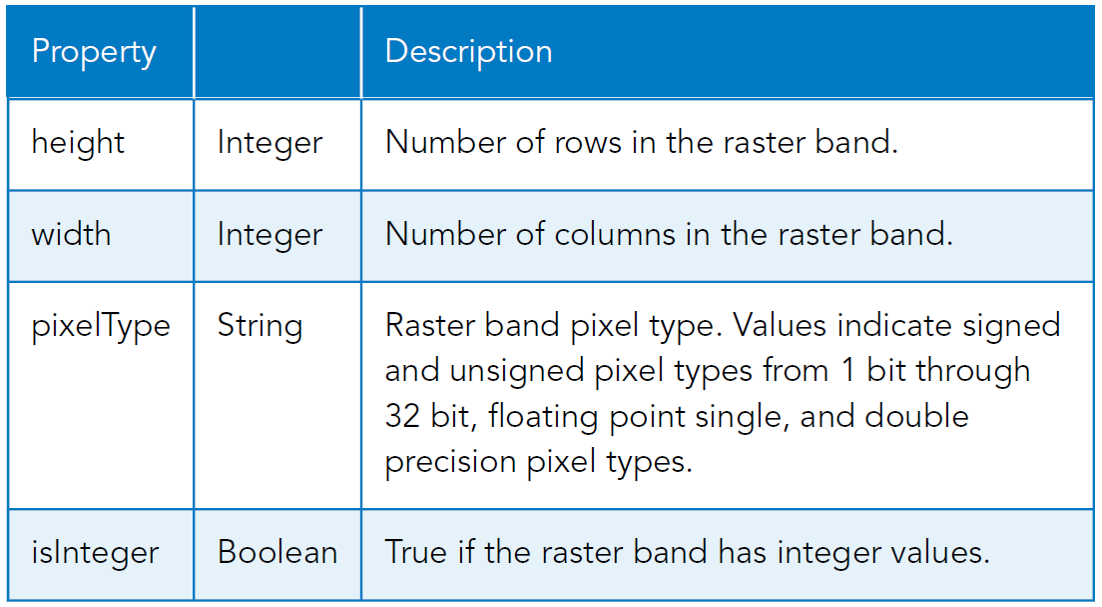


In [12]:
desc = arcpy.Describe("./database/testdata.gdb/ElevationFloat")
print("{:15} {}".format("height: ", desc.height))
print("{:15} {}".format("width:", desc.width))
print("{:15} {}".format("pixelType:", desc.pixelType))
print("{:15} {}".format("isInteger:", desc.isInteger))

height:         207
width:          233
pixelType:      F32
isInteger:      False


In [13]:
desc = arcpy.Describe("./database/testdata.gdb/buffers_poly")
print("{:15} {}".format("Data type: ", desc.dataType))
print("{:15} {}".format("File path: ", desc.path))
print("{:15} {}".format("Catalog path: ", desc.catalogPath))
print("{:15} {}".format("File name: ", desc.file))
print("{:15} {}".format("Base name: ",desc.baseName))
print("{:15} {}".format("Name: ", desc.name))

Data type:      FeatureClass
File path:      ./database/testdata.gdb
Catalog path:   ./database/testdata.gdb/buffers_poly
File name:      buffers_poly
Base name:      buffers_poly
Name:           buffers_poly


### Describing a feature class and raster

You can use the `Describe` object `dataType` property to determine what is being described. Some of the values returned by the dataType property include:

- FeatureLayer
- FeatureClass
- File
- Folder
- LasDataset
- Layer
- MosaicDataset
- NetworkDataset
- RasterBand
- RasterDataset
- ShapeFile
- Table
- TextFile
- Toolbox
  The complete list of dataType can be found at: http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/arcinfo-item-properties.htm

The `hasattr()` function returns a Boolean value. An example of using the function with the Describe object is shown below.


In [14]:
desc = arcpy.Describe("./database/testdata.gdb/ElevationFloat")
if hasattr(desc, "name"):
    print("Name: {}".format(desc.name))
if hasattr(desc, "bandCount"):
    print("Raster bands: {}".format(str(desc.bandCount)))
if hasattr(desc, "shapeType"):
    print("Shape type: {}".format(desc.shapeType))

Name: ElevationFloat
Raster bands: 1


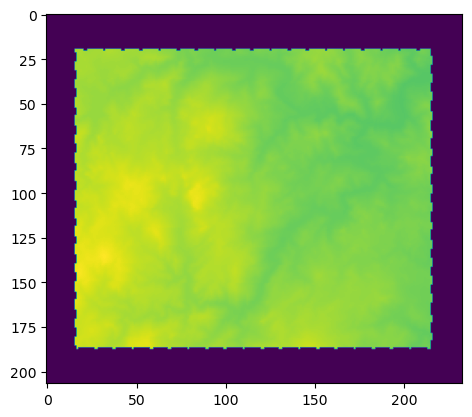

In [15]:
import matplotlib.pyplot as plt
image = arcpy.RasterToNumPyArray("./database/testdata.gdb/ElevationInt")
plt.imshow(image)
plt.show()

## List Data

- Listing data is very common
- Several different list functions in `ArcPy`

  1. `ListFields`
  2. `ListIndexes`
  3. `ListDataset`
  4. `ListFeatureClasses`
  5. `ListFiles`
  6. `ListRasters`
  7. `ListTables`
  8. `ListWorkspaces`
  9. `ListVersions`

- Similar logic:

  1. Create a `list`
  2. Iterate over the `list` using a `for` loop

- The complete list data functions can be found at: http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/listdatasets.htm


### List Feature Classes

- The `ListFeatureClasses` function returns a list of feature classes in the current workspace
- General syntax:

  ```python
  ListFeatureClasses ({wild_card}, {feature_type}, {feature_dataset})
  ```

- No filtering:
  ```python
  fclist = arcpy.ListFeatureClasses()
  ```
- Filtering based on **wild card**
  ```python
  fclist = arcpy.ListFeatureClasses("c*")
  ```
- Filtering based on `feature` `type`
  ```python
  fclist = arcpy.ListFeatureClasses("", "point")
  ```


In [16]:
arcpy.env.workspace = r"./database"
fclist = arcpy.ListFeatureClasses()
print(fclist)

['airports.shp', 'alaska.shp', 'amtrak_stations.shp', 'cities.shp', 'counties.shp', 'new_mexico.shp', 'railroads.shp', 'resultbuffers_poly.shp', 'resultLittlePolys.shp', 'resultWatersheds_polygon.shp', 'roads.shp']


In [17]:
fclist = arcpy.ListFeatureClasses("*es.shp")
print(fclist)

['cities.shp', 'counties.shp']


### Listing Fields

- The `ListFields` function lists the `fields` in a `feature class` or `table` in a specified dataset.
- General syntax:
  ```python
  ListFields(dataset, {wild_card}, {field_type})
  ```


In [18]:
fieldlist = arcpy.ListFields("cities.shp")
for field in fieldlist:
    print("{:15} : {}".format(field.name,field.type))

FID             : OID
Shape           : Geometry
CITIESX020      : Double
FEATURE         : String
NAME            : String
POP_RANGE       : String
POP_2000        : Integer
FIPS55          : String
COUNTY          : String
FIPS            : String
STATE           : String
STATE_FIPS      : String
DISPLAY         : SmallInteger


### Using Lists in for loops

The following script creates a list of `fields` of type `String` and determines for each text field **what the length of the field is**


In [19]:
fieldlist = arcpy.ListFields("cities.shp","", "String")
for field in fieldlist:
    print("{:15} {}".format(field.name, str(field.length)))

FEATURE         27
NAME            48
POP_RANGE       21
FIPS55          5
COUNTY          55
FIPS            5
STATE           2
STATE_FIPS      2


The following script creates a list of `TIFF` files and iterates through each file in the **list to build pyramids**

- [Build Pyramids (Data Management)](https://pro.arcgis.com/en/pro-app/latest/tool-reference/data-management/build-pyramids.htm)

![](https://pro.arcgis.com/en/pro-app/latest/tool-reference/data-management/GUID-14C093C8-2F10-4515-8C72-C5372CB8C947-web.gif)


In [20]:
tifflist = arcpy.ListRasters("", "TIF" )
for tiff in tifflist:
    print(tiff)
    arcpy.BuildPyramids_management(tiff)

resultElevationFloat..tif
resultElevationFloat.tif
resultsElevationFloat.tif


## Manipulating Spatial Data

- `arcpy.da cursors`
  1. `Search cursor`
  2. `Update cursor`
  3. `Insert cursor`
- SQL query


### What's Cursor?

1. Similar to `list` functions:
   - Iterate through `feature classes`, `tables`, and `fields`
2. Cursors:
   - Iterate through `rows` in a table
   - Read and write `geometries` to and from records, `row` by `row`

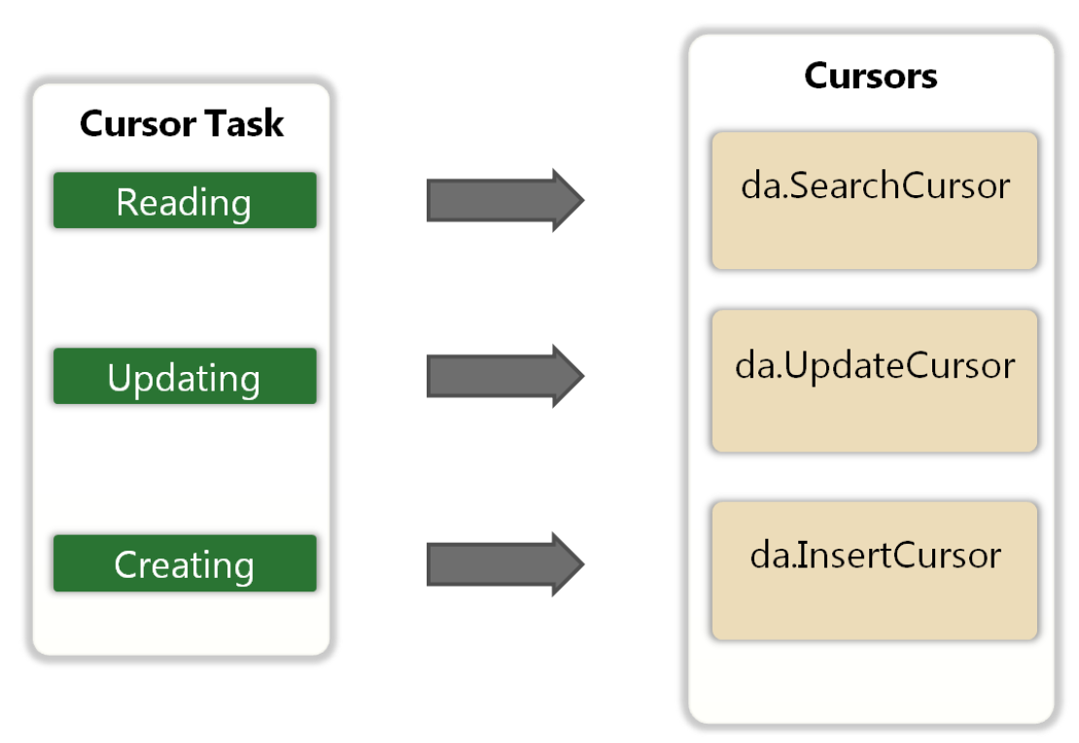


### [Cursor Methods](http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-classes/cursor.htm)

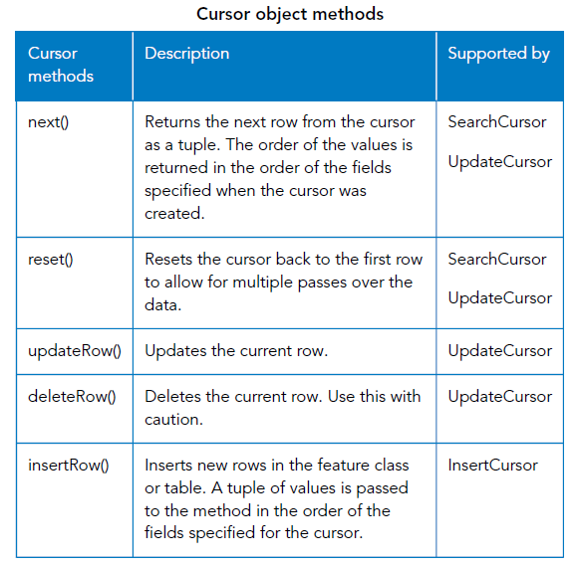


- General Syntax
  1. Required parameters:
     - `An input table`
     - `A list (or tuple) of field names`
  2. General syntax:
     ```python
     arcpy.da.InsertCursor(in_table, field_names)
     arcpy.da.SearchCursor(in_table, field_names, {where_clause}, {spatial_reference}, {explore_to_points})
     arcpy.da.UpdateCursor(in_table, field_names, {where_clause}, {spatial_reference}, {explore_to_points})
     ```


### [SearchCursor](http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-data-access/searchcursor-class.htm)

- General syntax
  ```python
  arcpy.da.SearchCursor(in_table, field_names, {where_clause}, {spatial_reference}, {explore_to_points})
  ```
- Parameters
  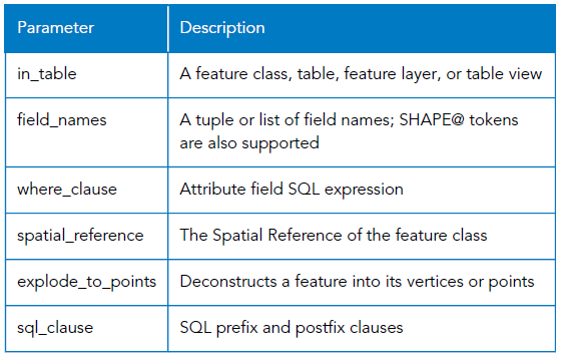
- Methods
  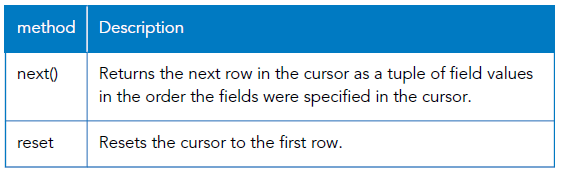


In [21]:
fc = "airports.shp"
desc = arcpy.Describe(fc)
fields = desc.fields
for field in fields:
    print("{:15} {}".format(field.name, field.type))

FID             OID
Shape           Geometry
AREA            Double
PERIMETER       Double
AIRPRTX020      Double
LOCID           String
FEATURE         String
NAME            String
TOT_ENP         Double
STATE           String
COUNTY          String
FIPS            String
STATE_FIPS      String


In [23]:
fc = "airports.shp"
fields = ["LOCID", "NAME"]
cursor = arcpy.da.SearchCursor(fc, fields)
for index,row in enumerate(cursor):
    print("LOCID = {}, NAME = {}".format(row[0], row[1]))
    if index > 10:
        break
del cursor, row

LOCID = 4Z7, NAME = Hyder
LOCID = KCL, NAME = Chignik Lagoon
LOCID = KKA, NAME = Koyuk
LOCID = KVL, NAME = Kivalina
LOCID = 5KE, NAME = Ketchikan Harbor
LOCID = MTM, NAME = Metlakatla
LOCID = KWF, NAME = Waterfall
LOCID = KTN, NAME = Ketchikan
LOCID = KXA, NAME = Kasaan
LOCID = HYL, NAME = Hollis
LOCID = CGA, NAME = Craig
LOCID = KTB, NAME = Thorne Bay


Select by attribute using SQL


In [24]:
fields = ["LOCID", "NAME", "FEATURE"]
cursor = arcpy.da.SearchCursor(fc, fields, where_clause="\"FEATURE\" <> 'Airport'")
for row in cursor:
    print("LOCID = {:10} NAME = {:20} FEATURE = {}".format(row[0], row[1], row[2]))
del cursor, row

LOCID = 4Z7        NAME = Hyder                FEATURE = Seaplane Base
LOCID = 5KE        NAME = Ketchikan Harbor     FEATURE = Seaplane Base
LOCID = MTM        NAME = Metlakatla           FEATURE = Seaplane Base
LOCID = KWF        NAME = Waterfall            FEATURE = Seaplane Base
LOCID = KXA        NAME = Kasaan               FEATURE = Seaplane Base
LOCID = HYL        NAME = Hollis               FEATURE = Seaplane Base
LOCID = CGA        NAME = Craig                FEATURE = Seaplane Base
LOCID = KTB        NAME = Thorne Bay           FEATURE = Seaplane Base
LOCID = KCC        NAME = Coffman Cove         FEATURE = Seaplane Base
LOCID = 84K        NAME = Meyers Chuck         FEATURE = Seaplane Base
LOCID = 78K        NAME = Yes Bay Lodge        FEATURE = Seaplane Base
LOCID = KAE        NAME = Kake                 FEATURE = Seaplane Base
LOCID = AGN        NAME = Angoon               FEATURE = Seaplane Base
LOCID = FNR        NAME = Funter Bay           FEATURE = Seaplane Base
LOCID 

`With` statement:

1. Guarantee closure and release of database lock
2. Reset iteration


In [25]:
fields = ["LOCID", "NAME"]
with arcpy.da.SearchCursor(fc, fields) as cursor:
    for index, row in enumerate(cursor):
        print("LOCID = {}, NAME = {}".format(row[0], row[1]))
        if index == 10:
            break

LOCID = 4Z7, NAME = Hyder
LOCID = KCL, NAME = Chignik Lagoon
LOCID = KKA, NAME = Koyuk
LOCID = KVL, NAME = Kivalina
LOCID = 5KE, NAME = Ketchikan Harbor
LOCID = MTM, NAME = Metlakatla
LOCID = KWF, NAME = Waterfall
LOCID = KTN, NAME = Ketchikan
LOCID = KXA, NAME = Kasaan
LOCID = HYL, NAME = Hollis
LOCID = CGA, NAME = Craig


### Shape Field Tokens for feature classes

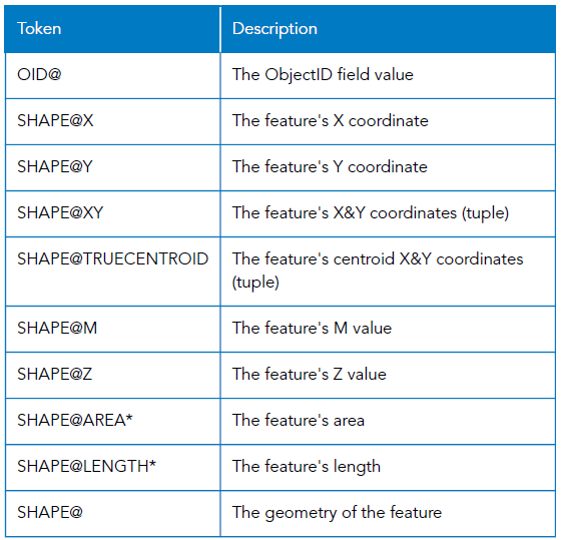


In [26]:
fc = "airports.shp"
fields = ["NAME","SHAPE@X","SHAPE@Y"]
cursor =  arcpy.da.SearchCursor(fc, fields)
for index, row in enumerate(cursor):
    print("NAME = {:20} X = {:.4f}    Y = {:.4f}".format(row[0],row[1],row[2]))
    if index == 10: 
        break
del cursor, row

NAME = Hyder                X = -130.0125    Y = 55.9043
NAME = Chignik Lagoon       X = -158.5326    Y = 56.3079
NAME = Koyuk                X = -161.1511    Y = 64.9381
NAME = Kivalina             X = -164.5256    Y = 67.7452
NAME = Ketchikan Harbor     X = -131.6851    Y = 55.3478
NAME = Metlakatla           X = -131.5781    Y = 55.1310
NAME = Waterfall            X = -133.2433    Y = 55.2963
NAME = Ketchikan            X = -131.7137    Y = 55.3556
NAME = Kasaan               X = -132.3975    Y = 55.5374
NAME = Hollis               X = -132.6461    Y = 55.4816
NAME = Craig                X = -133.1478    Y = 55.4788


### [InsertCursor](http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-data-access/insertcursor-class.htm)

- General syntax
  `arcpy.da.InsertCursor(in_table, field_names)`

- Parameters

  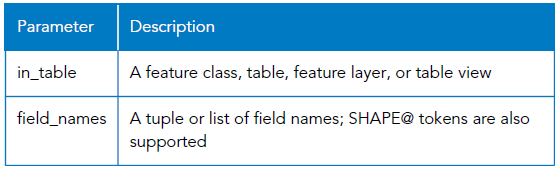

- Methods

  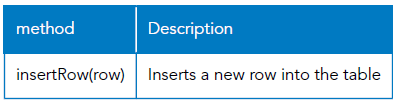


In [27]:
fc = "airports.shp"
fields = ["NAME","SHAPE@X","SHAPE@Y"]
cursor =  arcpy.da.InsertCursor(fc, fields)
cursor.insertRow(["Binghamton",-155,60])
del cursor

In [28]:
fc = "airports.shp"
fields = ["NAME","SHAPE@XY"]
cursor =  arcpy.da.InsertCursor(fc,fields)
cursor.insertRow(["Corning",(-154,55)])
del cursor

### [UpdateCursor](http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-data-access/updatecursor-class.htm)

- General Syntax
  `arcpy.da.UpdateCursor(in_table,field_names, (where_clause},{spatial_reference}, (explode_to_points},{sql_clause})`

- Parameters

  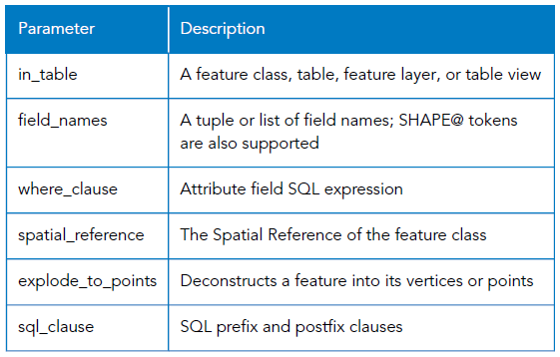

- Methods

  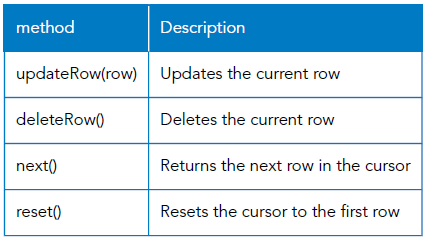


In [29]:
fc = "airports.shp"
fields = ["NAME"]
cursor =  arcpy.da.UpdateCursor(fc, fields)
for row in cursor:
    if row[0] == "Binghamton":
        row[0] = "Albany"
        cursor.updateRow(row)
del cursor, row

In [30]:
fc = "airports.shp"
fields = ["NAME"]
cursor =  arcpy.da.UpdateCursor(fc, fields)
for row in cursor:
    if row[0] == "Albany" or row[0] == "Corning":
        cursor.deleteRow()
del cursor, row

### Cursor Table Locking

1. Shared lock

   - Placed on a `table` any time a `table` or `feature clas`s is accessed by ArcGIS.
   - Examples of `shared locks`: Displaying a `feature class` in ArcMap or previewing a table in ArcCatalog.

2. Exclusive lock

   - Applied when changes are made to a `table` or `feature class`, either to field values or to the schema.
   - Examples of when an `exclusive lock` is applied: Using an `UpdateCursor` or `InsertCursor` in a Python IDE, saving edits to a feature class in ArcMap, or changing the schema in ArcCatalog.

3. Release the lock
   - `del row`
   - `del cursor`


In [31]:
fc = "airports.shp"
fields = ["NAME"]
cursor =  arcpy.da.UpdateCursor(fc, fields)
for row in cursor:
    if row[0] == "Albany":
        cursor.deleteRow()
del row
del cursor

## Using SQL in Python

1. Structured Query Language (SQL)

   - Apply a query based on attribute table
   - As `where_clause` parameters in many tools in `ArcToolbox`

2. Example:

   ```python
   SearchCursor(in_table, field_names {where_clause}, {spatial_reference}, {fields}, {explode_to_points})
   Select_analysis(in_features, out_feature_class, {where_clause})
   ```

3. Field delimiters
   1. (`" "`) for `shapefiles` and `file geodatabase` `feature classes`
   2. (`[ ]`) for personal `geodatabase` `feature classes`
4. `AddFieldDelimiters` function

   1. `AddFieldDelimiters(datasource,field)`

   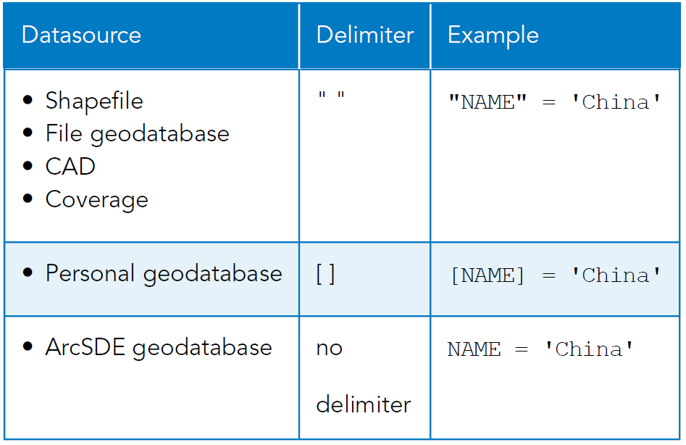


In [32]:
fc = "airports.shp"
fieldname = "NAME"
delimfield = arcpy.AddFieldDelimiters(fc,fieldname)
where_clause = delimfield + "='Goodnews'"
print(where_clause)
cursor =  arcpy.da.SearchCursor(fc,["NAME","LOCID"],where_clause)
for row in cursor:
    print("LOCID = {}".format(row[1]))
del cursor, row

"NAME"='Goodnews'
LOCID = GNU


## Validating Table Names

- Determine whether a `table` name is valid for a workspace
- Any invalid characters will be replaced by an underscore (`_`)
- General syntax:
  ```python
  arcpy.ValidateTableName(name, {workspace})
  ```


In [33]:
workspace = "./database/testdata.gdb"
table = arcpy.ValidateTableName("all roads",workspace)
print(table)

all_roads


In [34]:
workspace = "./database/testdata.gdb"
fclist = arcpy.ListFeatureClasses()
for fc in fclist:
    print(fc)
    fcname = arcpy.Describe(fc).basename
    newfcname = arcpy.ValidateTableName(fcname)
    outfc = os.path.join(workspace,newfcname)
    print(outfc)
    arcpy.CopyFeatures_management(fc,outfc)

airports.shp
./database/testdata.gdb\airports
alaska.shp
./database/testdata.gdb\alaska
amtrak_stations.shp
./database/testdata.gdb\amtrak_stations
cities.shp
./database/testdata.gdb\cities
counties.shp
./database/testdata.gdb\counties
new_mexico.shp
./database/testdata.gdb\new_mexico
railroads.shp
./database/testdata.gdb\railroads
resultbuffers_poly.shp
./database/testdata.gdb\resultbuffers_poly
resultLittlePolys.shp
./database/testdata.gdb\resultLittlePolys
resultWatersheds_polygon.shp
./database/testdata.gdb\resultWatersheds_polygon
roads.shp
./database/testdata.gdb\roads


## Validating Field Names

- Determine whether a field name is valid for a workspace
- Any invalid characters will be replaced by an underscore (`_`)
- General syntax:
  ```python
  arcpy.ValidateFieldName(name, {workspace})
  ```


In [35]:
fc = "./database/airports.shp"
fieldname = arcpy.ValidateFieldName("NEW%&",fc)
arcpy.AddField_management(fc,fieldname,"TEXT","","",10)

<Result './database/airports.shp'>

In [36]:
fields = arcpy.ListFields(fc)
for field in fields:
    print(field.name)

FID
Shape
AREA
PERIMETER
AIRPRTX020
LOCID
FEATURE
NAME
TOT_ENP
STATE
COUNTY
FIPS
STATE_FIPS
NEW__


## Creating Unique Names

- Creates a unique `filename` in the specified workspace by appending a number to the input name


In [37]:
fc = "./database/airports.shp"
unique_name = arcpy.CreateUniqueName("buffer.shp")
arcpy.Buffer_analysis(fc,unique_name,"1000 FEET")

<Result '.\\database\\buffer.shp'>

In [38]:
unique_name = arcpy.CreateUniqueName("buffer.shp")
arcpy.Buffer_analysis(fc,unique_name,"1000 FEET")

<Result '.\\database\\buffer0.shp'>

In [39]:
arcpy.ListFeatureClasses()

['airports.shp',
 'alaska.shp',
 'amtrak_stations.shp',
 'buffer.shp',
 'buffer0.shp',
 'cities.shp',
 'counties.shp',
 'new_mexico.shp',
 'railroads.shp',
 'resultbuffers_poly.shp',
 'resultLittlePolys.shp',
 'resultWatersheds_polygon.shp',
 'roads.shp']

In [40]:
fc = "./database/airports.shp"
fullname = arcpy.ParseTableName(fc)
namelist = fullname.split(", ")
databasename = namelist[0]
ownername = namelist[1]
fcname = namelist[2]
print(databasename)
print(ownername)
print(fcname)

(null)
(null)
./database/airports.shp


## Parsing Table and Field Names

- `ParseTableName` function
  - Return `database name`, `owner name`, and `table name`.
  - Separated by a comma (`,`)


## Example Script


### Q1

1. Select those airports that are located in the `Nome Census Area` county and print out their `NAME` and `LOCID`


In [42]:
fc = "./database/airports.shp"
fd_lst = ["COUNTY","NAME","LOCID"]
cursor = arcpy.da.SearchCursor(fc,fd_lst)
for row in cursor:
    if row[0] == 'Nome Census Area':
        print("COUNTY = %s      NAME = %-20s LOCID = %-20s" %(row[0],row[1],row[2]))
del cursor,row

COUNTY = Nome Census Area      NAME = Koyuk                LOCID = KKA                 
COUNTY = Nome Census Area      NAME = Saint Michael        LOCID = 5S8                 
COUNTY = Nome Census Area      NAME = Stebbins             LOCID = WBB                 
COUNTY = Nome Census Area      NAME = Unalakleet           LOCID = UNK                 
COUNTY = Nome Census Area      NAME = Shaktoolik           LOCID = 38A                 
COUNTY = Nome Census Area      NAME = Elim                 LOCID = ELI                 
COUNTY = Nome Census Area      NAME = Golovin              LOCID = GLV                 
COUNTY = Nome Census Area      NAME = White Mountain       LOCID = WMO                 
COUNTY = Nome Census Area      NAME = Nome                 LOCID = OME                 
COUNTY = Nome Census Area      NAME = Savoonga             LOCID = SVA                 
COUNTY = Nome Census Area      NAME = Teller               LOCID = K54                 
COUNTY = Nome Census Area      N

2. Based on the selected airports in Question 1.1, update the `STATE` field to `AK` if their `STATE` field is `empty`.


In [47]:
fd_lst = ["COUNTY","NAME","LOCID","STATE"]
cursor = arcpy.da.UpdateCursor(fc,fd_lst)
for row in cursor:
    if row[0] == 'Nome Census Area':
        if row[3] in [" ","",None]:
            row[3] = 'AK'
            cursor.updateRow(row)
        print("COUNTY = %s      NAME = %-20s LOCID = %-8s  STATE =% s" %(row[0],row[1],row[2],row[3]))
del cursor, row

COUNTY = Nome Census Area      NAME = Koyuk                LOCID = KKA       STATE =AK
COUNTY = Nome Census Area      NAME = Saint Michael        LOCID = 5S8       STATE =AK
COUNTY = Nome Census Area      NAME = Stebbins             LOCID = WBB       STATE =AK
COUNTY = Nome Census Area      NAME = Unalakleet           LOCID = UNK       STATE =AK
COUNTY = Nome Census Area      NAME = Shaktoolik           LOCID = 38A       STATE =AK
COUNTY = Nome Census Area      NAME = Elim                 LOCID = ELI       STATE =AK
COUNTY = Nome Census Area      NAME = Golovin              LOCID = GLV       STATE =AK
COUNTY = Nome Census Area      NAME = White Mountain       LOCID = WMO       STATE =AK
COUNTY = Nome Census Area      NAME = Nome                 LOCID = OME       STATE =AK
COUNTY = Nome Census Area      NAME = Savoonga             LOCID = SVA       STATE =AK
COUNTY = Nome Census Area      NAME = Teller               LOCID = K54       STATE =AK
COUNTY = Nome Census Area      NAME = Brevi

3. Export the information about those airports in `Nome Census Area` County to a `text` file, including these fields: `NAME`, `LOCID`, `Longitude`, and `Latitude`.


In [48]:
# Open the text file for writing
with open('./database/airports_NCA.txt', 'w') as f:
    # Print header for content written to the text file
    print('Content written to the text file:')
    
    # Define the list of fields to be retrieved from the feature class
    field_list = ["COUNTY", "NAME", "LOCID", "SHAPE@X", "SHAPE@Y"]
    
    # Create a search cursor to iterate through the feature class records
    with arcpy.da.SearchCursor(fc, field_list) as cursor:
        # Iterate through each row in the feature class
        for row in cursor:
            # Check if the COUNTY field value is 'Nome Census Area'
            if row[0] == 'Nome Census Area':
                # Format the row data
                row_new = "NAME = {:<20} LOCID = {:<10} X = {:<20} Y = {:<20}".format(row[1], row[2], row[3], row[4])
                
                # Print the formatted row data
                print(row_new)
                
                # Write the formatted row data to the text file
                f.write(row_new + '\n')

# Cleanup: Close the cursor and delete the cursor and row objects
del cursor, row

Content written to the text file:
NAME = Koyuk                LOCID = KKA        X = -161.1510772705078   Y = 64.93807220458984   
NAME = Saint Michael        LOCID = 5S8        X = -162.11036682128906  Y = 63.49005126953125   
NAME = Stebbins             LOCID = WBB        X = -162.28274536132812  Y = 63.51591873168945   
NAME = Unalakleet           LOCID = UNK        X = -160.7989501953125   Y = 63.88835906982422   
NAME = Shaktoolik           LOCID = 38A        X = -161.20252990722656  Y = 64.36263275146484   
NAME = Elim                 LOCID = ELI        X = -162.2700653076172   Y = 64.61400604248047   
NAME = Golovin              LOCID = GLV        X = -163.03952026367188  Y = 64.5434341430664    
NAME = White Mountain       LOCID = WMO        X = -163.4125518798828   Y = 64.68919372558594   
NAME = Nome                 LOCID = OME        X = -165.44525146484375  Y = 64.51219940185547   
NAME = Savoonga             LOCID = SVA        X = -170.4926300048828   Y = 63.68639373779297

### Q2

Write a program that converts the `airports.txt` into a `Point`-type `shapefile`. The resulting `shapefile` should have the following fields based on the information from the `airports.txt`, including `NAME`, `LOCID`, `X`, and `Y`.


In [50]:
# Set overwrite output to True to overwrite existing outputs
arcpy.env.overwriteOutput = True

# Define the output path for the feature class
out_path = arcpy.env.workspace + '/results'

# Define the fields to be added to the feature class
fields = ["NAME", "LOCID", "SHAPE@X", "SHAPE@Y"]

try:
    # Create a new feature class
    arcpy.CreateFeatureclass_management(out_path, 'airports.shp', geometry_type="POINT")
    print('Creating output feature class: ' + out_path + '/airports.shp')
    print('Adding fields to the feature class ...')
    
    # Add fields to the feature class
    for field in fields:
        arcpy.AddField_management(out_path + '/airports.shp', field, "String")
    
    # List fields in the feature class and print their names
    fields_fc = arcpy.ListFields(out_path + '/airports.shp')
    for field in fields_fc:
        print(field.name)
    
    print('Successful add fields.')
    
    # Create an insert cursor to insert rows into the feature class
    cursor = arcpy.da.InsertCursor(out_path + '/airports.shp', fields)
    
    # Read data from the airports.txt file and insert rows into the feature class
    with open('./database/airports.txt') as f:
        line = f.readline()
        while line:
            # Split each line into a list of values
            row1 = list(line.split(','))
            # Insert a new row into the feature class with values from the list
            cursor.insertRow([row1[1].split(':')[1], row1[2].split(':')[1], row1[3].split(':')[1], row1[4].split(':')[1]])
            line = f.readline()
    
    print('Successful add field')
    
except Exception as e:
    # Print error message if an exception occurs
    print('Something went wrong: {}'.format(str(e)))

finally:
    # Clean up: close the cursor
    del cursor

Creating output feature class: ./database/results/airports.shp
Adding fields to the feature class ...
FID
Shape
Id
NAME
LOCID
SHAPE_X
SHAPE_Y
Successful add fields.
Successful add field


In [52]:
cursor = arcpy.da.SearchCursor(out_path + '/airports.shp',fields)
for index,row in enumerate(cursor):
    row_new = "NAME = %-20s  LOCID = %-10s X = %-20s  Y = % s" %(row[0],row[1],row[2],row[3])
    print(row_new)
    if index == 10:
        break

NAME =  Hyder                LOCID =  4Z7       X = -130.012527           Y = 55.904339
NAME =  Chignik Lagoon       LOCID =  KCL       X = -158.532562           Y = 56.307869
NAME =  Koyuk                LOCID =  KKA       X = -161.151077           Y = 64.938072
NAME =  Kivalina             LOCID =  KVL       X = -164.525589           Y = 67.745209
NAME =  Ketchikan Harbor     LOCID =  5KE       X = -131.685104           Y = 55.347809
NAME =  Metlakatla           LOCID =  MTM       X = -131.578064           Y = 55.131046
NAME =  Waterfall            LOCID =  KWF       X = -133.243332           Y = 55.296322
NAME =  Ketchikan            LOCID =  KTN       X = -131.713745           Y = 55.355568
NAME =  Kasaan               LOCID =  KXA       X = -132.397522           Y = 55.537415
NAME =  Hollis               LOCID =  HYL       X = -132.646088           Y = 55.481586
NAME =  Craig                LOCID =  CGA       X = -133.147797           Y = 55.478832


### Q3

Write a script that determines the `perimeter` (in meters) and `area` (in square meters) of each of the individual islands of the `Hawaii.shp` feature class.

Note that this is a multipart feature class.


In [71]:
# Define the path to the feature class
fc = './database/Hawaii.shp'

# Define the spatial reference (WGS84)
spatialRef = arcpy.Describe(fc).spatialReference

# Create a search cursor to iterate over the features in the feature class
with arcpy.da.SearchCursor(fc, ["SHAPE@"]) as cursor:
    # Iterate over each feature in the feature class
    for row in cursor:
        # Get the polygon token from the current row
        polygon_token = row[0]
        
        print(polygon_token.type)
        # Print the number of parts in the polygon
        print('partCount = ' + str(polygon_token.partCount))
        
        # Iterate over each part of the polygon
        for index, part in enumerate(polygon_token):
            # Create a Polygon object from the part
            polygon = arcpy.Polygon(part, spatialRef)
            
            # Create a Polyline object from the part
            line = arcpy.Polyline(part, spatialRef)
            
            # Print the information about the part
            print('Part %-2s :  Length = %10.2f    Area = %15.2f' % (index, line.length, polygon.area))

polygon
partCount = 11
Part 0  :  Length =  498725.06    Area =  10486352988.49
Part 1  :  Length =   56881.00    Area =    119076863.76
Part 2  :  Length =   79591.07    Area =    364740852.50
Part 3  :  Length =  237012.26    Area =   1907482650.23
Part 4  :  Length =  161088.60    Area =    685386630.23
Part 5  :  Length =    4352.76    Area =      1031618.81
Part 6  :  Length =    4695.33    Area =      1256964.65
Part 7  :  Length =  272519.59    Area =   1577775022.82
Part 8  :  Length =   78651.62    Area =    196286564.36
Part 9  :  Length =    4013.22    Area =       856335.76
Part 10 :  Length =  172463.40    Area =   1449442867.86


### Q4

Write a script that **creates a minimum bounding rectangle** for the `Hawaii.shp` feature class.

There is a tool called [Minimum Bounding Geometry](https://pro.arcgis.com/en/pro-app/latest/tool-reference/data-management/minimum-bounding-geometry.htm) that can do this.

However, your script should NOT use the tool `arcpy.MinimumBoundingGeometry_management`. Instead, use the `hullRectange` properties of a `Geometry` object to create the minimum bounding rectangle.

![image.png](https://pro.arcgis.com/en/pro-app/latest/tool-reference/data-management/GUID-EFBA5DB8-A161-4FE1-B2CB-792B65DC1469-web.png)


In [88]:
# Define the path to the feature class
fc = './database/Hawaii.shp'

# Define the output path for the minimum bounding rectangle feature class
output = arcpy.env.workspace + './database/results/Q3_envelope.shp'

spatialRef = arcpy.Describe(fc).spatialReference

# Create a minimum bounding rectangle for the input feature class
# by using the hullRectangle property of a Geometry object
with arcpy.da.SearchCursor(fc, ["SHAPE@"]) as cursor:
    for row in cursor:
        print(row[0].partCount)
        for index, polygon_part in enumerate(row[0]):
            print(index)
            # Create a Polygon object from the part
            polygon = arcpy.Polygon(polygon_part, spatialRef)
            print(polygon.hullRectangle)


11
0
943452.045900083 2160752.06931347 848866.961181604 2083569.33663454 761452.559297907 2190693.0198836 856037.644016057 2267875.75256261
1
741987.411147994 2266446.54838429 739403.087068047 2276911.38299657 756327.786963191 2281090.99128523 758912.111043138 2270626.15667294
2
700329.879914286 2311913.08339925 716664.021966844 2322755.68775116 731206.155671257 2300848.28709669 714872.013618692 2290005.68274478
3
818656.946992389 2308498.04573065 806668.560448796 2267121.79026442 732099.1055373 2288727.59871061 744087.492080953 2330103.85417688
4
675773.867014209 2333905.67154126 677887.859782256 2351901.97126307 739033.109838283 2344719.34936758 736919.117070233 2326723.0496458
5
617716.988055287 2357152.4317731 617128.289145738 2356185.76019109 615769.262568636 2357013.40163508 616357.961478184 2357980.07321708
6
608378.257655837 2362447.44331445 607760.712556828 2363140.4548852 609083.222390602 2364318.94814665 609700.767489611 2363625.9365759
7
645377.403116668 2359929.29082676 61